In [1]:
import random 
import numpy as np
import pandas as pd

### Perceptron od neuronu różni sie tym że wagi są aktualizowane przez funkcje aktywacji, której nie ma w perceptronie. W perceptronie dane musza być rozdzielne linowo żeby osiągnął zbierzność !!
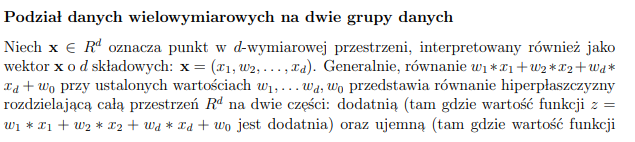
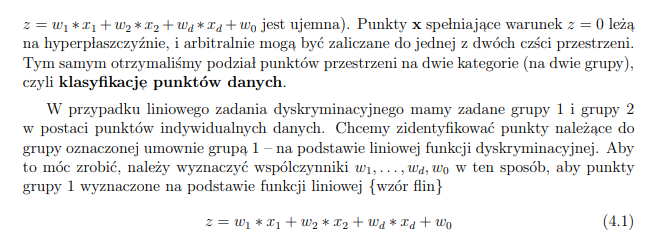
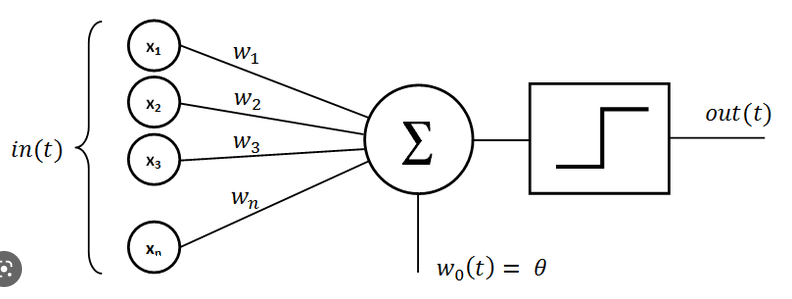

#### watrość wyjsciowa to przewidziana przez f. skoku jednostowego etykieta 
#### aktualizację watrości każdej wagi w wktorze wag można zapisać 
#### w = w+delta*w
#### gdzie delta w = n(y - yi)x gdzie ( n - leraning rate, y- wartosć docelowa, yi - watrość przewidziana 
#### x - przykład uczący)
#### WSZYSTKIE WAGI W WEKTORZE SA AKTUALIZOWANE JEDNOCZEŚNIE !

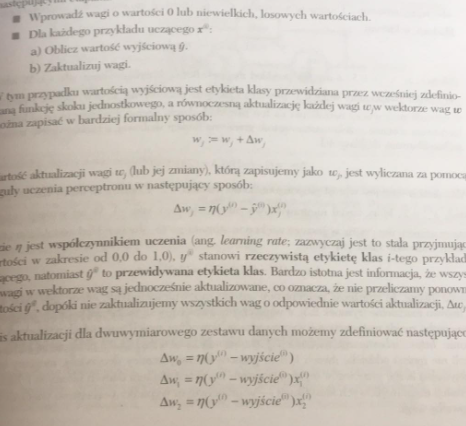


In [14]:
# JEŚLI DANE NIE SA ROZDZIELNE LINIWO TO ALGORTYM NIE OSIAGNIE ZBIERZNOŚĆ (NIE RODZIELI ZBIORÓW)
# A WAGI BĘDĄ AKUALIZOWANE W NIESKOŃCZNOŚĆ

In [2]:
class Perceptron(object):
    # ETA - współczynnik z przedziału 0.0-1.0
    # n_iter - liczba przebiegów po zestawach uczących 
    # randowm_state - genertor losowych wag
    
    # w_ - wagi po dopasowaniu 
    # errors_ - liczba niprawidłowych klasyfikacji w każdej epoce
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X,y):
        #X - zb. uczący [n_ptzykładów, n_cech]
        #y - wartrosci docelowe [n_przykładów]
        rgen = np.random.RandomState(self.random_state)# generowanie liczb losowych
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # generowanie rozkładu normalnego 
        # odchyl std 0,01, 
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        # tylko całkowite pobudzenia
        return np.dot(X, self.w_[1:]+self.w_[0])# oblicza iloczyn skakarny wektorów
    
    def predict(self, X):
        # zwraca etykiete klasy po oblczeniu funcji skoku
        return np.where(self.net_input(X) >= 0.0, 1, -1)# jak istrukcja if zwraca co jest w nawiasie

In [3]:
# import datasetu 
import os

In [4]:
s = os.path.join("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
print(s)

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [5]:
df = pd.read_csv(s, header=None, encoding="utf-8")
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
import matplotlib.pyplot as plt
#  WEKTOR Y
# 50 - etykiet (1-versicolor)
# 50 - etykiet(-1 setosa)

# MACIERZ X
# 1 kolumna - dł. działki
# 2 - kolumna - dł. płatka 


In [7]:
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

In [8]:
X = df.iloc[0:100, [0,2]].values

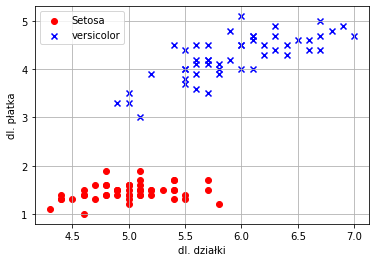

In [9]:
plt.scatter(X[:50, 0], X[:50,1],
           color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1],
           color="blue", marker="x", label="versicolor")
plt.xlabel("dl. działki")
plt.ylabel("dl. płatka")
plt.grid()
plt.legend()
plt.show()

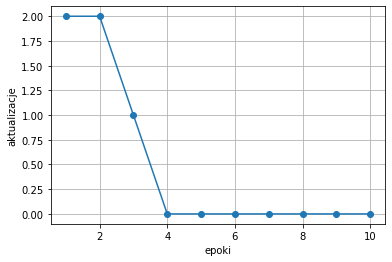

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker="o")
plt.xlabel("epoki")
plt.ylabel("aktualizacje")
plt.grid()

plt.show()
## zbierzność perceptronu już w 4 epoce 

In [11]:
# funkcja do wizualizacji granic decyzyjnych 
from matplotlib.colors import ListedColormap

In [12]:
def plot_decision_regions(X,y, classifier, resolution=0.02):
    markers = ("s","x","o","^","v")
    colors = ("red","blue","gray","cyan", "yellow")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # reysuje wykres powierzchni decyzyjnej 
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # zwraca macierze z wektorami 
                          np.arange(x2_min, x2_max, resolution)) # wspołrzędnych
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()) # limity osi
    plt.ylim(xx2.min(), xx2.max()) 
    
    # rysuje wykres przykładów 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y== cl, 0], y=X[y==cl, 1],
                   alpha=0.8,
                   marker=markers[idx], label=cl,
                   edgecolors="black")   

C:\Users\Grzegorz Mróz\AppData\Local\Temp\ipykernel_21236\1192515574.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y== cl, 0], y=X[y==cl, 1],


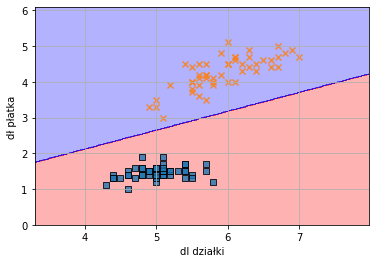

In [13]:
plot_decision_regions(X,y, classifier=ppn)
plt.xlabel("dl działki")
plt.ylabel("dł płatka")
plt.grid()
plt.show()


### Neuron liniwoy (z f. aktywacji liniową, która porównuje rzeczywiste etykiety z wartościami funkcji liniowej )
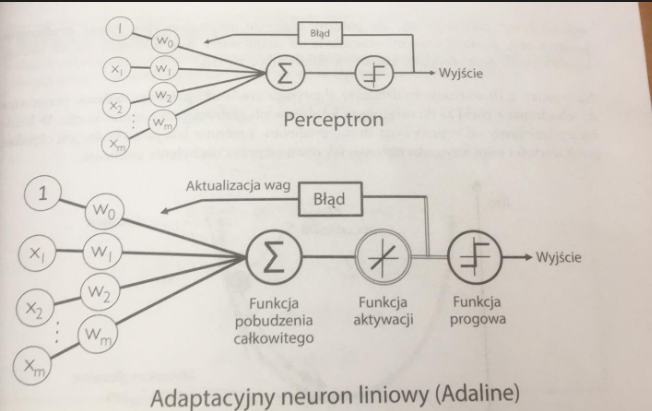
####  - przy neuronie trzeba zdefiniować f. kosztu czyli sume odległosci kwadratów między etykietami rzeczywistymi a watrościmi funkcji aktywacji 
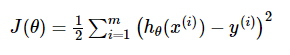
#### - dzięki f. liniowej można zastoswać różniczkowanie czyli gradient prosty 
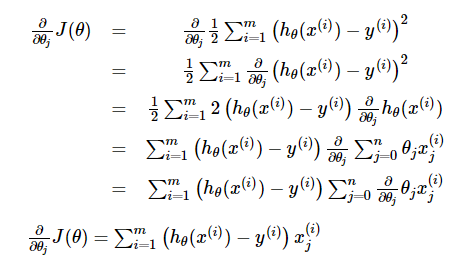

##### zmiania wagi :   w = w + delta w   , delta w = - n*gradient J(0) gdzie (-n) - learning rate
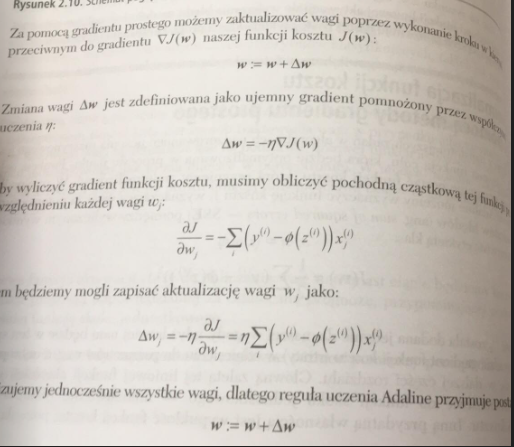
#####     wagi są aktualizowe po obliczeniu wsztkich pochodnych cząstowych daltego gradient ma tz. batch size




In [15]:
##  ALGORTYM RÓZNI SIE OD PERCEPTRONU TYM ZE WAGI SĄ AKTULAIZOWANE POPRZEZ MINIMALIZACJE 
# FUNCJI KOSZTU ZA POMOCĄ GRADIENTU PROSTEGO 

In [ ]:
# funkcja kosztu jest minimalizowana przez wykonanie kroku oddalającego od gradientu kosztu 
# obliczonego z całego zestawu danych dltego jest to WSADOWĄ METODĄ GRADIETU PROSTEGO

In [21]:
# Algorytm Adaline czyli neuron z funkcja aktywacji
class AdalineGD(object):
    # eta - zmienno przecinkwy wsłczynnik z zakresu 0.0-0.1
    # n_iter - liczba przebiegów po zestwaie uczącym (epoki)
    # random state - generator liczb losowych do inicjowania losowych wag
    # w_ - wagi po dopasowaniu
    # cost_ - suma kwadratów błędów 
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        # X - wektor uczenia [n_przykładów, n_cech]
        # y - watrości docelowe [n_przykładów]
        # zwarca self: obiekt
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen = rgen.normal(loc=0.0, scale=0.01,
                                    size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            # wagi od 1 do m, gdzie X.T.dot(errors) jest iloczynem macierz cech x wektor błędów 
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()# oblicznie gradientu dla całego zestawu danych
            cost = (errors**2).sum() /2.0# obicznanie f. kosztu (suma kwadrtów)
            self.cost_.append(cost)# służy do badania zbierzności algorytmu
        return self
    
    def net_input(self, X):
        # oblicza całkowite pobudzenie
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def activation(self, X):
        # oblicza linową f. atywacji
        return X
    
    def predict(self, X):
        # zwraca eykiete klasy po wykonaniu skoku jednistowego (funkcjia progowa - przwidywanie)
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    

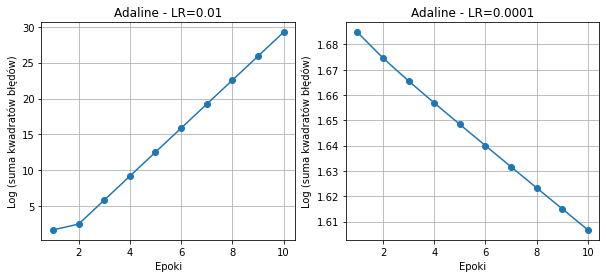

In [27]:
## TWORZENIE WYKERSÓW DLA DWÓCH RÓŻNYCH LR = 0.01 I LR= 0.0001

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 =  AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1 , len(ada1.cost_)+1), np.log10(ada1.cost_), marker ="o")
ax[0].set_xlabel("Epoki")
ax[0].set_ylabel("Log (suma kwadratów błędów)")
ax[0].grid()
ax[0].set_title("Adaline - LR=0.01")

ada2 =  AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1 , len(ada2.cost_)+1), np.log10(ada2.cost_), marker ="o")
ax[1].set_xlabel("Epoki")
ax[1].set_ylabel("Log (suma kwadratów błędów)")
ax[1].set_title("Adaline - LR=0.0001")
ax[1].grid()
plt.show()

In [ ]:
# na pirweszym wykersie algorytm gradietu przeskoczył nad minium glowbalnym 
# na drugim wykresie utknął w minium lokalmym 

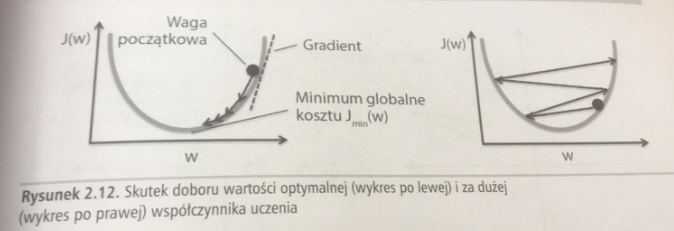

#### Usprawnienie gradientu przez skalowanie cech 
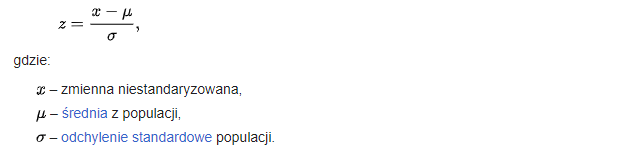
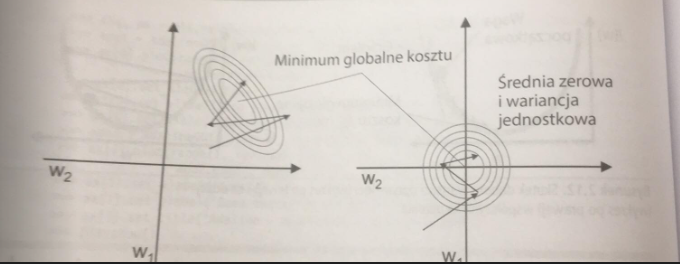

In [45]:
# w tym celu można wykożystać standaryzację, (od watrości odjąć średnia i podzielić przez odch. std)
X_std = np.copy(X)
X_std[:20]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5]])

In [39]:
X_std[:30,0] # pierwsza kolumna 

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7])

In [38]:
X_std[:30,1] # druga kolumna

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6])

In [46]:
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

C:\Users\Grzegorz Mróz\AppData\Local\Temp\ipykernel_21236\1192515574.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y== cl, 0], y=X[y==cl, 1],


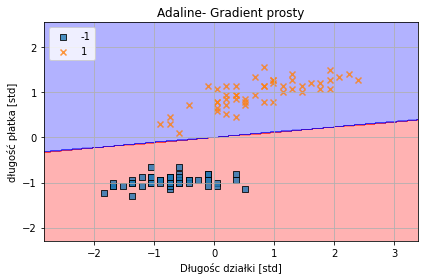

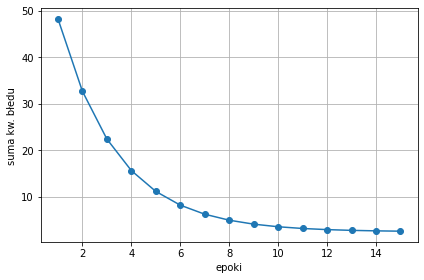

In [47]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std,y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline- Gradient prosty")
plt.xlabel("Długośc działki [std]")
plt.ylabel("długość płatka [std]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.grid()
plt.show()

plt.plot(range(1 , len(ada_gd.cost_)+1), ada_gd.cost_, marker ="o")
plt.xlabel("epoki")
plt.ylabel("suma kw. błedu")
plt.tight_layout()
plt.grid()
plt.show()

In [48]:
# algorytm osiągnął zbieżność przy LR = 0.01 na stadndaryzowanych danych 

###  Wieloskalowe uczenie i metoda sochastycznego spadku wzdłuż gradientu 
##### Wagi nie są aktualizowane przez sumę nagromadzonych błędów tylko aktualiujemy wagi przyrostowo dla każdego przykładu uczącego dlatego algorytm szybciej osiąga zbieżność i jest mnej wrażliwi na minima lokalne. Nie ma też dużego znaczenia czy dane uczące sa aktualizowane bo algorym sie do nich dostosuje.

##### Leraning  rate w tym przypadku jest adaptacyjny i maleje z upływem czasu 
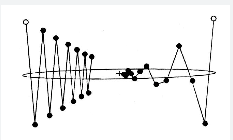
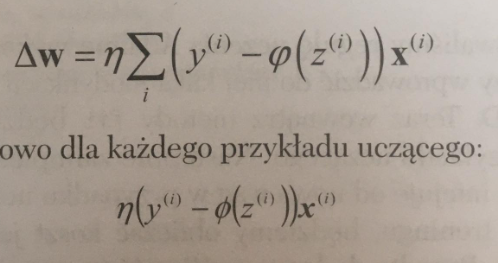

In [68]:
from numpy.random import seed
### IMPLEMANTACJA SDG
class AdalineSGD(object):
    # eta - zmienno przecinkwy wsłczynnik z zakresu 0.0-0.1
    # n_iter - liczba przebiegów po zestwaie uczącym (epoki)
    # random state - generator liczb losowych do inicjowania losowych wag
    # w_ - wagi po dopasowaniu
    # cost_ - suma kwadratów błędów 
    # shuffle - wartosc boolowska (True),  testuje dane uczące prezd każdą epoką w celu zapobiegania 
    # cykliczności 
    
    def __init__(self, eta=0.01, n_iter=10,shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.w_initializer = False
        self.random_state = random_state
        
    def fit(self, X, y):
        # X - wektor uczenia [n_przykładów, n_cech]
        # y - watrości docelowe [n_przykładów]
        # zwarca self: obiekt
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost=[]
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
                avg_cos = sum(cost)/len(y)
                self.cost_.append(avg_cos)
        return self
    
    def partial_fit(self, X,y):
        #dopasowanie danych uczących bez ponownego aktualizowania wag
        if not self.w_initializer:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] >1 :
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self, X,y):
        # tasuje dane
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        # incjuje wagi przydzielając im małe watości 
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale=0.01, size = 1 +m)
        self.w_initializer = True
        
    def _update_weights(self, xi, target):
        # reuła uczenia z adaline do aktualizacji wag 
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5*error**2
        return cost
    
    def net_input(self, X):
        # oblicza całkowite pobudzenie
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def activation(self, X):
        # oblicza linową f. atywacji
        return X
    
    def predict(self, X):
        # zwraca eykiete klasy po wykonaniu skoku jednistowego (funkcjia progowa - przwidywanie)
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
        

C:\Users\Grzegorz Mróz\AppData\Local\Temp\ipykernel_21236\1192515574.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y== cl, 0], y=X[y==cl, 1],


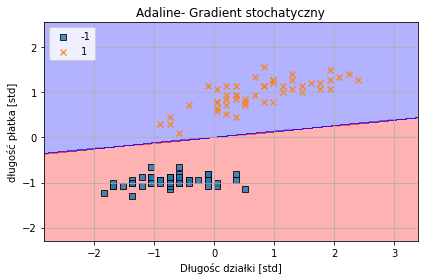

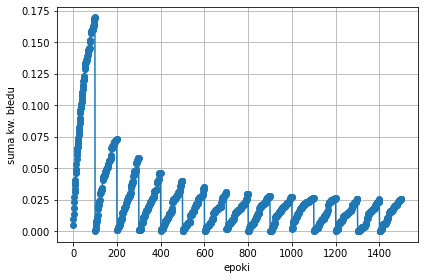

In [71]:
ada_sdg = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sdg.fit(X_std,y)

plot_decision_regions(X_std, y, classifier=ada_sdg)
plt.title("Adaline- Gradient stochatyczny")
plt.xlabel("Długośc działki [std]")
plt.ylabel("długość płatka [std]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.grid()
plt.show()

plt.plot(range(1 , len(ada_sdg.cost_)+1), ada_sdg.cost_, marker ="o")
plt.xlabel("epoki")
plt.ylabel("suma kw. błedu")
plt.tight_layout()
plt.grid()
plt.show()